In [1]:
# load dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, Normalizer
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
import time

In [2]:
# read in data
raw_data = pd.read_csv("data.csv")

In [3]:
# assign X, y data set and split to training and testing data sets
y = raw_data['target'].values
X = raw_data.drop('target', axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=42)

In [4]:
# generate model list to be tested
models_list = []
models_list.append(('DT', DecisionTreeClassifier()))
models_list.append(('SVM', SVC())) 
models_list.append(('NB', GaussianNB()))
models_list.append(('KNN', KNeighborsClassifier()))
models_list.append(('RF', RandomForestClassifier()))
models_list.append(('NN', MLPClassifier()))

In [31]:
# evaluate models performance
num_folds = 10
results = []
names = []

for name, model in models_list:
    kfold = KFold(n_splits=num_folds, random_state=123)
    start = time.time()
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    end = time.time()
    results.append(cv_results)
    names.append(name)
    print( "%s: %f (%f) (run time: %f)" % (name, cv_results.mean(), cv_results.std(), end-start))

DT: 0.937244 (0.025497) (run time: 0.088220)
SVM: 0.625769 (0.074918) (run time: 0.129470)
NB: 0.937115 (0.025816) (run time: 0.018411)
KNN: 0.901859 (0.044437) (run time: 0.024984)
RF: 0.929615 (0.037154) (run time: 0.358464)
NN: 0.591731 (0.230116) (run time: 0.193524)


In [32]:
print(plt.style.available)


['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


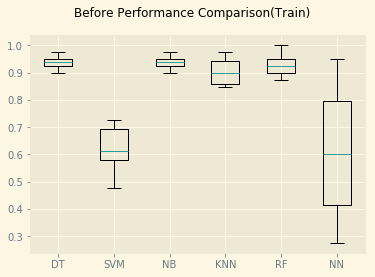

In [33]:
# plot the results
fig = plt.figure()
plt.style.use(['grayscale','Solarize_Light2' ])
fig.suptitle('Before Performance Comparison(Train)')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()
#plt.savefig("performenceBefore.png")

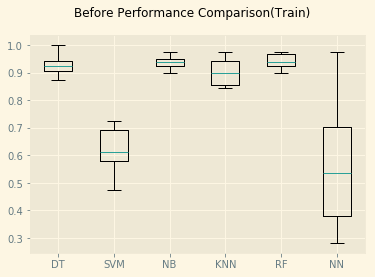

In [8]:
fig = plt.figure(figsize = (6,4))
fig.suptitle('Before Performance Comparison(Train)')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
#ax.set_yticklabels(names)
plt.show()

In [34]:
# evaluate models performance
num_folds = 10
results = []
names = []

for name, model in models_list:
    kfold = KFold(n_splits=num_folds, random_state=123)
    start = time.time()
    cv_results = cross_val_score(model, X_test, y_test, cv=kfold, scoring='accuracy')
    end = time.time()
    results.append(cv_results)
    names.append(name)
    print( "%s: %f (%f) (run time: %f)" % (name, cv_results.mean(), cv_results.std(), end-start))

DT: 0.911765 (0.075560) (run time: 0.032740)
SVM: 0.632026 (0.088757) (run time: 0.050093)
NB: 0.935294 (0.055494) (run time: 0.014179)
KNN: 0.970588 (0.029412) (run time: 0.021251)
RF: 0.947059 (0.048862) (run time: 0.202490)
NN: 0.561438 (0.160269) (run time: 0.102836)


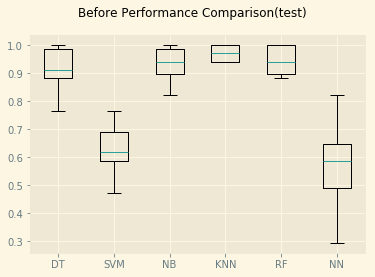

<Figure size 432x288 with 0 Axes>

In [35]:
# plot the results
fig = plt.figure(figsize = (6,4))
fig.suptitle('Before Performance Comparison(test)')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()
plt.savefig("performenceBefore.png")

## After Scaled data & Modified Parameters

In [36]:
# using Pipeline and evaluate models again using scaled data

import warnings

# Standardize the dataset
pipelines = []

pipelines.append(('ScaledDT', Pipeline([('Scaler', StandardScaler()),('CART',
                                                                        DecisionTreeClassifier(max_depth=4, random_state=0))])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC(C=1000))])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB',
                                                                      GaussianNB())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',
                                                                       KNeighborsClassifier(n_neighbors = 8))])))
pipelines.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()), ('RF', 
                                                                       RandomForestClassifier(max_depth=4, random_state=0))])))
pipelines.append(('ScaledNN', Pipeline([('Scaler', StandardScaler()), ('NN', 
                                                                       MLPClassifier(hidden_layer_sizes=5, activation='relu',  alpha=0.5,  learning_rate='constant',   max_iter=200))])))
results = []
names = []
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    kfold = KFold(n_splits=num_folds, random_state=123)
    for name, model in pipelines:
        start = time.time()
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
        end = time.time()
        results.append(cv_results)
        names.append(name)
        print( "%s: %f (%f) (run time: %f)" % (name, cv_results.mean(), cv_results.std(), end-start))

ScaledDT: 0.912115 (0.037466) (run time: 0.076971)
ScaledSVM: 0.959744 (0.025601) (run time: 0.053332)
ScaledNB: 0.929615 (0.024717) (run time: 0.027534)
ScaledKNN: 0.957244 (0.025335) (run time: 0.041469)
ScaledRF: 0.939744 (0.019878) (run time: 0.262689)
ScaledNN: 0.942244 (0.050027) (run time: 4.339888)


In [17]:
results

[array([1.        , 1.        , 1.        , 0.94117647, 0.88235294,
        0.88235294, 0.88235294, 0.94117647, 0.88235294, 0.88235294]),
 array([0.94444444, 0.94117647, 1.        , 1.        , 0.88235294,
        0.94117647, 1.        , 0.94117647, 0.88235294, 1.        ]),
 array([0.94444444, 0.94117647, 1.        , 1.        , 0.88235294,
        1.        , 0.94117647, 0.94117647, 0.82352941, 0.88235294]),
 array([0.94444444, 0.94117647, 1.        , 1.        , 0.88235294,
        1.        , 0.94117647, 1.        , 0.88235294, 0.94117647]),
 array([1.        , 0.94117647, 1.        , 0.94117647, 0.88235294,
        0.88235294, 1.        , 0.88235294, 0.94117647, 1.        ]),
 array([1.        , 1.        , 1.        , 0.94117647, 0.94117647,
        0.94117647, 1.        , 0.94117647, 0.88235294, 0.94117647])]

In [19]:
import numpy as np

np.arange(0, 1, 0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

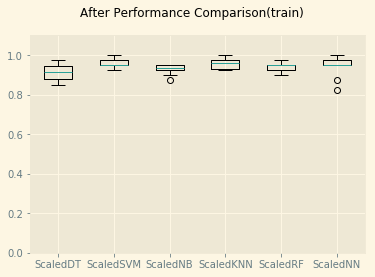

In [37]:
import numpy as np
# plot the results
fig = plt.figure(figsize = (6,4))
fig.suptitle('After Performance Comparison(train)')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_ylim(0, 1.1)
ax.set_xticklabels(names)
plt.show()



In [38]:
# using Pipeline and evaluate models again using scaled data

import warnings

# Standardize the dataset
pipelines = []

pipelines.append(('ScaledDT', Pipeline([('Scaler', StandardScaler()),('CART',
                                                                        DecisionTreeClassifier(max_depth=4, random_state=0))])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC(C=1000))])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB',
                                                                      GaussianNB())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',
                                                                       KNeighborsClassifier(n_neighbors = 8))])))
pipelines.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()), ('RF', 
                                                                       RandomForestClassifier(max_depth=4, random_state=0))])))
pipelines.append(('ScaledNN', Pipeline([('Scaler', StandardScaler()), ('NN', 
                                                                       MLPClassifier(hidden_layer_sizes=5, activation='relu',  alpha=0.5,  learning_rate='constant',   max_iter=200))])))
results = []
names = []
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    kfold = KFold(n_splits=num_folds, random_state=123)
    for name, model in pipelines:
        start = time.time()
        cv_results = cross_val_score(model, X_test, y_test, cv=kfold, scoring='accuracy')
        end = time.time()
        results.append(cv_results)
        names.append(name)
        print( "%s: %f (%f) (run time: %f)" % (name, cv_results.mean(), cv_results.std(), end-start))

ScaledDT: 0.929412 (0.051281) (run time: 0.041276)
ScaledSVM: 0.953268 (0.043943) (run time: 0.038130)
ScaledNB: 0.935621 (0.055537) (run time: 0.026227)
ScaledKNN: 0.953268 (0.043943) (run time: 0.032264)
ScaledRF: 0.947059 (0.048862) (run time: 0.234088)
ScaledNN: 0.941176 (0.045565) (run time: 1.535703)


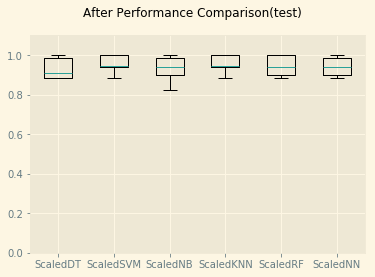

In [39]:
# plot the results
fig = plt.figure(figsize = (6,4))
fig.suptitle('After Performance Comparison(test)')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
ax.set_ylim(0, 1.1)
plt.show()


